In [141]:
import cobra.test
import os
from os.path import join
from cobra.io import read_sbml_model
model = cobra.io.load_json_model(join("RehMBEL1391_sbml_L3V1.json"))
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

# Adding D-glucose to the medium and checking out other C-sources

The model we are using has D-fructorse as carbon source.

## Standard medium content of the model

In [94]:
model.medium

{'EX_fe2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_pi_e': 100.0,
 'EX_cobalt2_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_k_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fru_e': 3.0,
 'EX_nh4_e': 10.0,
 'EX_na_e': 10.0,
 'EX_o2_e': 18.5,
 'EX_mobd_e': 10.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 100.0}

Taking a look at the fluxes

In [95]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
fe2_e,EX_fe2_e,6.333E-05,0,0.00%
fru_e,EX_fru_e,3,6,100.00%
h_e,EX_h_e,10.72,0,0.00%
nh4_e,EX_nh4_e,3.038,0,0.00%
o2_e,EX_o2_e,5.734,0,0.00%
pi_e,EX_pi_e,7.987,0,0.00%
so4_e,EX_so4_e,0.05797,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
BIOMASS_c,EX_BIOMASS_c,-0.2853,0,0.00%
co2_e,EX_co2_e,-6.151,1,100.00%


In [96]:
#model.objective = model.reactions.EX_BIOMASS_c #klipp ut snart
#print(model.optimize().objective_value)

The fluxes when we change the objective. We want to make bioplastic:

In [97]:
model.objective = model.reactions.EX_pbhb_e

In [98]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
fru_e,EX_fru_e,3,6,100.00%
o2_e,EX_o2_e,1.068,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-2.949,1,100.00%
h2o_e,EX_h2o_e,-6.712,0,0.00%
phb_e,EX_pbhb_e,-3.763,0,0.00%


#### Trying to include D-glucose in the medium and look at the bimass and production of PHB.

With the current medium with fructose, the biomass, productivity and yeald of phb:

In [117]:
with model:
    medium = model.medium
    medium['EX_fru_e'] = 3
    #print(medium)
    model.medium = medium
    
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    print(model.summary())
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    fruBM=solution.fluxes['EX_BIOMASS_c']
    print('----------------')
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    solution= model.optimize()
    print('The maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    fruPHB=phb_production
    print('----------------')
    maximum_yield = phb_production / (-1*(model.reactions.EX_fru_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol fructose') 
    fruYLD=maximum_yield
    fruData=[fruBM.round(3), round(fruPHB,3),round(fruYLD,3)]

Objective
1.0 EX_BIOMASS_c = 0.28528586642770837

Uptake
------
Metabolite  Reaction      Flux  C-Number   C-Flux
     fe2_e  EX_fe2_e 6.333E-05         0    0.00%
     fru_e  EX_fru_e         3         6  100.00%
       h_e    EX_h_e     10.72         0    0.00%
     nh4_e  EX_nh4_e     3.038         0    0.00%
      o2_e   EX_o2_e     5.734         0    0.00%
      pi_e   EX_pi_e     7.987         0    0.00%
     so4_e  EX_so4_e   0.05797         0    0.00%

Secretion
---------
Metabolite      Reaction    Flux  C-Number   C-Flux
 BIOMASS_c  EX_BIOMASS_c -0.2853         0    0.00%
     co2_e      EX_co2_e  -6.151         1  100.00%
     h2o_e      EX_h2o_e  -23.87         0    0.00%

The current theoretical maximum biomass productivity: 0.28528586642770826 h
----------------
The maximum theoretical productivity for making PHB: 3.762711864406772 mmol/gDW*h
----------------
Maximum theoretical yield = 1.2542372881355905 mmol phb/mmol fructose


### From the ilittereature we know R.eutropha can grow anarobically. But it seems like our model can not:

In [ ]:
with model:
    medium = model.medium
    medium['EX_o2_e'] = 0
    print(medium)
    model.medium=medium

    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    print(model.summary())
    
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    print('----------------')
    
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    print('The current maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    print('----------------')
    
    maximum_yield = phb_production / (-1*(model.reactions.EX_fru_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol Fructose')
    print(model.summary())

#### If the model needs O2, what is the optimum 02 concentration in the medium?

In [155]:
with model:
    medium = model.medium
    medium['EX_o2_e'] = 1000
    model.medium = medium
    
    ppp_biomass = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_BIOMASS_c)

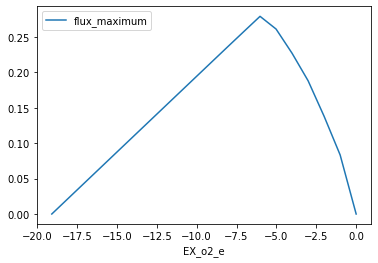

In [156]:
ppp_biomass.plot(x='EX_o2_e', y='flux_maximum')

In [165]:
with model:
    medium = model.medium
    medium['EX_o2_e'] = 1000
    model.medium = medium   
    model.objective = model.reactions.EX_pbhb_e
    
    ppp_phb = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_pbhb_e)

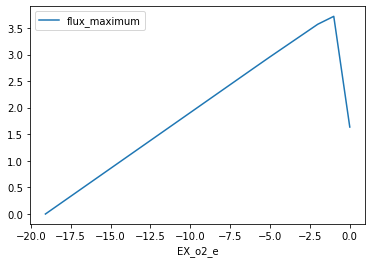

In [166]:
ppp_phb.plot(x='EX_o2_e', y='flux_maximum')

#### Looks like there is a maximum in 5.5 

### Our model contains also exchangereactions for succinate, fumarate and pyruvate. We are checking out the yealds for growing on these C-sourses. 


In [118]:
with model:
    medium = model.medium
    medium['EX_fru_e'] = 0
    medium['EX_succ_e'] = 3
    print(medium)
    model.medium=medium
    
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    solution= model.optimize()
    print(model.summary())
    
    print('The theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    print('----------------')
    succBM=solution.fluxes['EX_BIOMASS_c']
    
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    print('The maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    print('----------------')
    succPHB=phb_production
    
    maximum_yield = phb_production / (-1*(model.reactions.EX_succ_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol Succinate')
    print(model.summary())
    succYLD=maximum_yield
    succData=[succBM.round(3),round(succPHB,3),round(succYLD,3)]

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 0, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_succ_e': 3}
Objective
1.0 EX_BIOMASS_c = 0.16029975296619808

Uptake
------
Metabolite   Reaction      Flux  C-Number   C-Flux
     fe2_e   EX_fe2_e 3.559E-05         0    0.00%
       h_e     EX_h_e     11.32         0    0.00%
     nh4_e   EX_nh4_e     1.707         0    0.00%
      o2_e    EX_o2_e     3.608         0    0.00%
      pi_e    EX_pi_e     4.488         0    0.00%
     so4_e   EX_so4_e   0.03257         0    0.00%
    succ_e  EX_succ_e         3         4  100.00%

Secretion
---------
Metabolite      Reaction    Flux  C-Number   C-Flux
 BIOMASS_c  EX_BIOMASS_c -0.1603         0    0.00%
     co2_e      EX_co2_e  -5.342         1  100.00%
     h2o_e      EX_h2o_e   -12.3         0    0.00%

The theoretic

### The results form growing on fumarate:

In [119]:
with model:
    medium = model.medium
    medium['EX_fru_e'] = 0
    medium['EX_fum_e'] = 3
    print(medium)
    model.medium=medium
    
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    solution= model.optimize()
    print(model.summary())
    
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    print('----------------')
    fumBM=solution.fluxes['EX_BIOMASS_c']
    
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    print('The current maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    print('----------------')
    fumPHB=phb_production
    
    maximum_yield = phb_production / (-1*(model.reactions.EX_fum_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol Fumarate')
    fumYLD=maximum_yield
    fumData=[fumBM.round(3),round(fumPHB,3),round(fumYLD,3)]

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 0, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_fum_e': 3}
Objective
1.0 EX_BIOMASS_c = 0.14694144021900343

Uptake
------
Metabolite  Reaction      Flux  C-Number   C-Flux
     fe2_e  EX_fe2_e 3.262E-05         0    0.00%
     fum_e  EX_fum_e         3         4  100.00%
       h_e    EX_h_e     10.87         0    0.00%
     nh4_e  EX_nh4_e     1.565         0    0.00%
      o2_e   EX_o2_e     2.682         0    0.00%
      pi_e   EX_pi_e     4.114         0    0.00%
     so4_e  EX_so4_e   0.02986         0    0.00%

Secretion
---------
Metabolite      Reaction    Flux  C-Number   C-Flux
 BIOMASS_c  EX_BIOMASS_c -0.1469         0    0.00%
     co2_e      EX_co2_e  -5.897         1  100.00%
     h2o_e      EX_h2o_e  -9.022         0    0.00%

The current theoretica

### The results form growing on pyruvate:

In [120]:
with model:
    medium = model.medium
    medium['EX_fru_e'] = 0
    medium['EX_pyr_e'] = 3
    print(medium)
    model.medium=medium
    
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    solution= model.optimize()
    print(model.summary())
    
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    print('----------------')
    pyrBM=solution.fluxes['EX_BIOMASS_c']
    
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    print('The current maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    print('----------------')
    pyrPHB=phb_production
    
    maximum_yield = phb_production / (-1*(model.reactions.EX_pyr_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol Pyruvate')
    pyrYLD=maximum_yield
    pyrData=[pyrBM.round(3),round(pyrPHB,3),round(pyrYLD,3)]

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 0, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_pyr_e': 3}
Objective
1.0 EX_BIOMASS_c = 0.11617084064313381

Uptake
------
Metabolite  Reaction      Flux  C-Number   C-Flux
     fe2_e  EX_fe2_e 2.579E-05         0    0.00%
       h_e    EX_h_e     6.852         0    0.00%
     nh4_e  EX_nh4_e     1.237         0    0.00%
      o2_e   EX_o2_e     2.505         0    0.00%
      pi_e   EX_pi_e     3.252         0    0.00%
     pyr_e  EX_pyr_e         3         3  100.00%
     so4_e  EX_so4_e   0.02361         0    0.00%

Secretion
---------
Metabolite      Reaction    Flux  C-Number   C-Flux
 BIOMASS_c  EX_BIOMASS_c -0.1162         0    0.00%
     co2_e      EX_co2_e  -4.175         1  100.00%
     h2o_e      EX_h2o_e  -8.389         0    0.00%

The current theoretica

### Have not found in the litterature that it can grow on ethanol, but because the exchangereaction is in the model. I got curious

In [101]:
model.reactions.EX_eth_e

Reaction identifier,EX_eth_e
Name,EX_eth_e
Memory address,0x016ea5aeffd0
Stoichiometry,etoh_e --> Ethanol -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [102]:
with model:
    medium = model.medium
    medium['EX_eth_e'] = 3
    medium['EX_fru_e'] = 0
    print(medium)
    model.medium=medium
    
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    solution= model.optimize()
    print(model.summary())
    
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h^-1')
    print('----------------')
    
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    print('The current maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 0, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_eth_e': 3}
Objective
1.0 EX_BIOMASS_c = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

The current theoretical maximum biomass productivity: 0.0 h
----------------
The current maximum theoretical productivity for making PHB: 0.0 mmol/gDW*h


### So ethanol is not taken up as a C-source

### To add D-glucose to the medium we need new reactions to make R.eutropha take up and use D-glucose as a carbon source. 

In [34]:
model.add_metabolites([
    Metabolite(
    'glc_e',
    name='D-glucose',
    compartment='e'
    )])

In [35]:
model.add_boundary(model.metabolites.get_by_id("glc_e"), type="exchange")

Reaction identifier,EX_glc_e
Name,D-glucose exchange
Memory address,0x016ea3d86190
Stoichiometry,glc_e <=> D-glucose <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [36]:
model.add_metabolites([
    Metabolite(
    'glc_c',
    name='D-glucose',
    compartment='c'
    )])

In [38]:
#reaction1 = Reaction('Exchange_glc')

In [39]:
#reaction1.add_metabolites({
#    model.metabolites.glc_e: -1.0,
#    model.metabolites.glc_c: 1.0,
                            })
#print(reaction.build_reaction_string())

IndentationError: unexpected indent (<ipython-input-39-dbc247b9e283>, line 4)

In [40]:
reaction = Reaction('PEP')

In [41]:
reaction.add_metabolites({
    model.metabolites.glc_c: -1.0,
    model.metabolites.pep_c: -1.0,
    model.metabolites.pyr_c: 1.0,
    model.metabolites.g6p_c: 1.0
                            })
print(reaction.build_reaction_string())

glc_c + pep_c --> g6p_c + pyr_c


### Adding glucose in the media and removing fructose:

In [43]:
with model:
    medium = model.medium
    medium['EX_glc_e'] = 3
    medium['EX_fru_e'] = 0
    print(medium)
    model.medium = medium
    solution= model.optimize()
    
    print(model.summary())
    model.objective = model.reactions.EX_BIOMASS_c
    solution=model.optimize()
    print('The current theoretical maximum biomass productivity:', solution.fluxes['EX_BIOMASS_c'], 'h')
    
    print('----------------')
    model.objective = model.reactions.EX_pbhb_e
    phb_production=model.optimize().objective_value
    solution= model.optimize()
    print('The maximum theoretical productivity for making PHB:', phb_production , 'mmol/gDW*h')
    
    print('----------------')
    maximum_yield = phb_production / (-1*(model.reactions.EX_glc_e.flux))
    print('Maximum theoretical yield =', maximum_yield, 'mmol phb/mmol glucose')
    

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 0, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_glc_e': 3}
Objective
1.0 EX_BIOMASS_c = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

The current theoretical maximum biomass productivity: 0.0 h
----------------
The maximum theoretical productivity for making PHB: 0.0 mmol/gDW*h
----------------


ZeroDivisionError: float division by zero

### With the data constructed in this file. Here is a table combinding the data in this file:

In [137]:
print("C-source ","\t","Biomass " , "\t","\t", "PHB production ", "\t" , "\t","Yeild"  ,"\n",
     "\t","\t", "[per hour]","\t", "[mmol phb/mmol Substrate]", "\t"," [mmol/gDW*h]", "\n",
    "Fructose","\t", fruData[0],"\t","\t","\t",fruData[1],"\t","\t","\t","\t",fruData[2],"\n",
    "Succinate","\t", succData[0],"\t","\t","\t",succData[1],"\t","\t","\t","\t",succData[2],"\n",
    "Fumarate","\t", fumData[0],"\t","\t","\t",fumData[1],"\t","\t","\t","\t",fumData[2],"\n",
    "Pyruvate","\t", pyrData[0],"\t","\t","\t",pyrData[1],"\t","\t","\t","\t",pyrData[2],"\n",
     )

C-source  	 Biomass  	 	 PHB production  	 	 Yeild 
 	 	 [per hour] 	 [mmol phb/mmol Substrate] 	  [mmol/gDW*h] 
 Fructose 	 0.285 	 	 	 3.763 	 	 	 	 1.254 
 Succinate 	 0.16 	 	 	 1.936 	 	 	 	 0.645 
 Fumarate 	 0.147 	 	 	 1.827 	 	 	 	 0.609 
 Pyruvate 	 0.116 	 	 	 1.602 	 	 	 	 0.534 



In [153]:
with model:
    medium = model.medium
    medium['EX_fru_e'] = 100
    model.medium = medium
    
    ppp_succ = production_envelope(model,
                    reactions=[model.reactions.EX_fru_e],
                    objective=model.reactions.EX_BIOMASS_c)

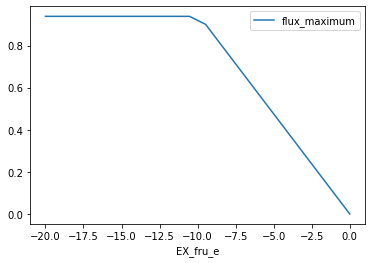

In [154]:
ppp_succ.plot(x='EX_fru_e', y='flux_maximum')